In [ ]:
install.packages("GGally")
install.packages("corrplot")  
install.packages("themis")

Warning message in install.packages("GGally"):
“installation of package ‘GGally’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Warning message in install.packages("corrplot"):
“installation of package ‘corrplot’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...


In [2]:
library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)
library(GGally)       
library(corrplot)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in library(GGally): there is no package called ‘GGally’


In [47]:
winequalityRed <- read_csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")|> 
                    mutate(quality = as.factor(quality))
head(winequalityRed)




ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0,18,0.075,13,40,0.9978,351,0.56,94,5


In [48]:
completedt <- winequalityRed |>
              setNames(c("fixed_acidity",
                         "volatile_acidity",
                         "citric_acid",
                         "residual_sugar",
                         "chlorides",
                         "free_SO2",
                         "total_SO2",
                         "density",
                         "pH",
                         "sulphates",
                         "alcohol",
                         "quality",
                         "type"))
completedt$volatile_acidity <- as.numeric(completedt$volatile_acidity)
completedt$citric_acid <- as.numeric(completedt$citric_acid)
completedt$residual_sugar <- as.numeric(completedt$residual_sugar)
completedt$chlorides <- as.numeric(completedt$chlorides)
completedt$density <- as.numeric(completedt$density)
completedt$sulphates <- as.numeric(completedt$sulphates)
head(completedt)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
74,0.66,0.00,18,0.075,13,40,0.9978,351,0.56,94,5


In [72]:
completedt<- completedt|>
                     #mutate_at(c('quality'), as.factor)|>
                     filter(!is.na(total_SO2))

#head(completedt)

In [73]:
set.seed(100)
wine_split <- initial_split(completedt, prop = 0.75, strata = volatile_acidity)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)
head(wine_training)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6
85,0.28,0.56,18,0.092,35,103,0.9969,33,0.75,105,7
79,0.32,0.51,18,0.341,17,56,0.9969,304,1.08,92,6
89,0.22,0.48,18,0.077,29,60,0.9968,339,0.53,94,6
76,0.39,0.31,23,0.082,23,71,0.9982,352,0.65,97,5
52,0.32,0.25,18,0.103,13,50,0.9957,338,0.55,92,5


In [30]:
wine_training |> select(volatile_acidity) |> max()

[1] 1.58

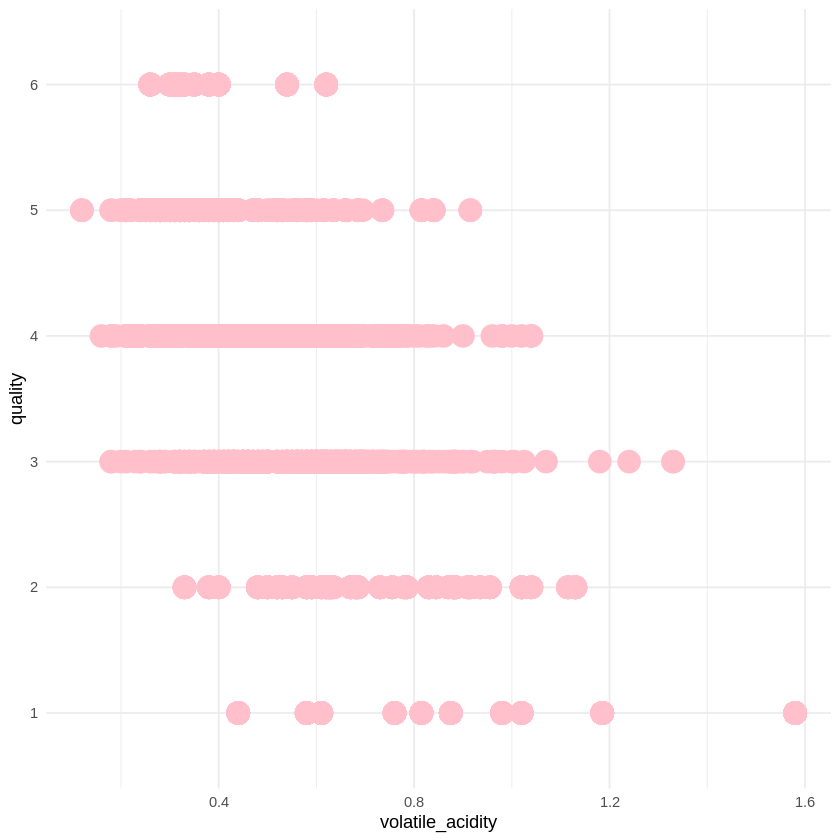

In [41]:
ggplot(wine_training, aes(volatile_acidity, quality)) +
  geom_pointrange(aes(xmin = 0.12, xmax = 1.58), size = 0.01) +
  geom_point(size = 6, colour = "pink") +
  theme_minimal()

In [42]:
#generating a correlation matrix between all numeric variables 
wine_training_corr <- wine_training|>
                     mutate_at(c('quality'), as.numeric)|>
                     filter(!is.na(total_SO2))
                    
winequalitycorr <-cor(wine_training_corr)

head(round(winequalitycorr,2))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality
fixed_acidity,1.00,-0.16,0.44,0.05,0.07,-0.14,-0.19,0.43,0.03,0.20,-0.01,0.14
volatile_acidity,-0.16,1.00,-0.63,0.19,0.15,-0.10,-0.10,-0.03,-0.18,-0.47,0.01,-0.66
citric_acid,0.44,-0.63,1.00,-0.02,0.12,0.03,0.06,0.38,0.03,0.48,-0.02,0.50
residual_sugar,0.05,0.19,-0.02,1.00,-0.01,-0.02,-0.04,0.09,0.04,-0.03,0.00,-0.09
chlorides,0.07,0.15,0.12,-0.01,1.00,0.03,0.01,0.12,-0.07,0.32,-0.01,-0.26
free_SO2,-0.14,-0.10,0.03,-0.02,0.03,1.00,0.66,-0.09,0.07,0.07,0.01,0.01


In [43]:
corrplot(winequalitycorr, method = 'color', order = 'hclust', addCoef.col = 1,  
       tl.cex = 1, number.cex = 1, tl.srt= 70)

ERROR: Error in corrplot(winequalitycorr, method = "color", order = "hclust", : could not find function "corrplot"


In [44]:
ggpairs(wine_training_corr) 

ERROR: Error in ggpairs(wine_training_corr): could not find function "ggpairs"


In [74]:
wine_recipe <- recipe(volatile_acidity ~ fixed_acidity + citric_acid + chlorides + total_SO2 + pH + sulphates, data = wine_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

wine_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("regression")

wine_vfold <- vfold_cv(wine_training, v = 10, strata = volatile_acidity)

wine_wkflw <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(wine_spec)

In [75]:
gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 3))

wine_results <- wine_wkflw |>
  tune_grid(resamples = wine_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse")

wine_min <- wine_results |>
  filter(mean == min(mean)) 

wine_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,0.1317065,10,0.003548957,Preprocessor1_Model03


In [76]:
wine_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = 7) |>
  set_engine("kknn") |>
  set_mode("regression")

knn_mult_fit <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(wine_spec) |>
  fit(data = wine_training)

knn_mult_preds <- knn_mult_fit |>
  predict(wine_testing) |>
 bind_cols(wine_testing) |>
    select(.pred, volatile_acidity)

head(knn_mult_preds)

knn_mult_mets <- metrics(knn_mult_preds, truth = volatile_acidity, estimate = .pred) |>
                     filter(.metric == 'rmse')

knn_mult_mets

.pred,volatile_acidity
<dbl>,<dbl>
0.6328571,0.88
0.6485714,0.58
0.4692857,0.61
0.6100000,0.62
0.5021429,0.56
0.5042857,0.40


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,0.1380705


In [64]:
prediction_diff <- knn_mult_preds |>
                    summarize(difference = (volatile_acidity - .pred))

head(prediction_diff)

difference
<dbl>
0.17857143
-0.03428571
-0.01642857
0.10000000
-0.02142857
-0.21285714


In [ ]:
#insert rmse table